# Explorations in Visualisation of Alice Thornton's Books
## Event Dates

The dates of events encoded in the [TEI-XML of Alice Thornton's books](https://github.com/kingsdigitallab/alice-thornton/tree/edition?tab=readme-ov-file) are made in [Extended Date/Time Format (EDTF)](https://www.loc.gov/standards/datetime/) Specification by Library of Congress.

We can load these from the `entities.json` that is created by the [indexing process](https://github.com/kingsdigitallab/alice-thornton/blob/main/.github/workflows/index-entities.yml) for the [web search](https://thornton.kdl.kcl.ac.uk/entities/).

In [1]:
import pandas as pd
import json

OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k


In [2]:
# Load JSON file with events and dates into a Pandas datafram
with open('entities-with-dates.json', 'r') as file:
    entities = json.load(file)

df = pd.DataFrame(entities['data'])

# Filter to get just the events (not people or places)
event_df = df[df['type'] == 'event'].copy()
event_df.head()

,type,id,sortkey,search,title,subtype,region,settlement,pages,books,bio,cat,date
2,event,aow1_1595_child_accident,Accident/danger: Alice Wandesford saved from c...,Accident/danger Alice Wandesford saved from ch...,Accident/danger: Alice Wandesford saved from c...,NaN,NaN,NaN,{'book_two': ['104-104']},[book_two],NaN,Accident/danger,1595%
3,event,cw1_1610_accident,Accident/danger: Christopher Wandesford (fathe...,Accident/danger Christopher Wandesford (father...,Accident/danger: Christopher Wandesford (fathe...,NaN,NaN,NaN,{'book_two': ['104-104']},[book_two],NaN,Accident/danger,1608~
4,event,awt1_1638_fire,Accident/danger: Fire at Dublin Castle,Accident/danger Fire at Dublin Castle,Accident/danger: Fire at Dublin Castle,NaN,NaN,NaN,{'book_one': ['291-291']},[book_one],NaN,Accident/danger,1638~
5,event,awt1_1636_fire,Accident/danger: Fire at the Wandesford house ...,Accident/danger Fire at the Wandesford house i...,Accident/danger: Fire at the Wandesford house ...,NaN,NaN,NaN,"{'book_of_remembrances': ['21-21'], 'book_one'...","[book_of_remembrances, book_one, book_two]",NaN,Accident/danger,1636/1638
6,event,awt1_1650_promise_gw1,Accident/danger: George Wandesford promised Th...,Accident/danger George Wandesford promised Tho...,Accident/danger: George Wandesford promised Th...,NaN,NaN,NaN,{'book_of_remembrances': ['191-192']},[book_of_remembrances],NaN,Accident/danger,1650~


In [3]:
# See if Pandas can handle the date format automagically (spoiler: it does not!)
event_df['date_reg'] = pd.to_datetime(event_df['date'], errors='coerce')
event_df['date_reg'].head()

/tmp/ipykernel_1718/1619900638.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  event_df['date_reg'] = pd.to_datetime(event_df['date'], errors='coerce')


2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
Name: date_reg, dtype: datetime64[ns]

In [4]:
# Tidy up Panda's mess
event_df.drop('date_reg', axis=1, inplace=True)

## EDTF library for parsing dates

Fortunately, there is a nice Python library on PyPi for parsing EDTF dates: [edtf](https://pypi.org/project/edtf/). 

We take the approach of storing `EDTFObject`s in the dataframe; these encapsulate the uncertainties that are encoded in the date format.

In [6]:
import time
import datetime

from edtf import parse_edtf
from edtf import struct_time_to_date

# Function to parse EDTF dates into EDTFObject
def parse_edtf_date(date_str):
    try:
        return parse_edtf(date_str) 
    except ValueError:
        return None


In [7]:
# Parse the dates and create a new column with EDTFObject
event_df['date_edtf'] = event_df['date'].apply(parse_edtf_date)
event_df.head()

,type,id,sortkey,search,title,subtype,region,settlement,pages,books,bio,cat,date,date_edtf
2,event,aow1_1595_child_accident,Accident/danger: Alice Wandesford saved from c...,Accident/danger Alice Wandesford saved from ch...,Accident/danger: Alice Wandesford saved from c...,NaN,NaN,NaN,{'book_two': ['104-104']},[book_two],NaN,Accident/danger,1595%,1595%
3,event,cw1_1610_accident,Accident/danger: Christopher Wandesford (fathe...,Accident/danger Christopher Wandesford (father...,Accident/danger: Christopher Wandesford (fathe...,NaN,NaN,NaN,{'book_two': ['104-104']},[book_two],NaN,Accident/danger,1608~,1608~
4,event,awt1_1638_fire,Accident/danger: Fire at Dublin Castle,Accident/danger Fire at Dublin Castle,Accident/danger: Fire at Dublin Castle,NaN,NaN,NaN,{'book_one': ['291-291']},[book_one],NaN,Accident/danger,1638~,1638~
5,event,awt1_1636_fire,Accident/danger: Fire at the Wandesford house ...,Accident/danger Fire at the Wandesford house i...,Accident/danger: Fire at the Wandesford house ...,NaN,NaN,NaN,"{'book_of_remembrances': ['21-21'], 'book_one'...","[book_of_remembrances, book_one, book_two]",NaN,Accident/danger,1636/1638,1636/1638
6,event,awt1_1650_promise_gw1,Accident/danger: George Wandesford promised Th...,Accident/danger George Wandesford promised Tho...,Accident/danger: George Wandesford promised Th...,NaN,NaN,NaN,{'book_of_remembrances': ['191-192']},[book_of_remembrances],NaN,Accident/danger,1650~,1650~


In order to visualise the dates, we need a format that visualisation libraries will understand, that is, specific dates (not ranges/regions) and in a compatible data structure. The `edtf` library will convert `EDTFObject` to specific Python `time.struct_time` using a variety of precision choices. (See the EDTF library documentation.)

In [8]:


# event_df['date_edtf_lower_strict'] = event_df['date_edtf'].apply(lambda edtf_obj: struct_time_to_date(edtf_obj.lower_strict()))
# event_df['date_edtf_upper_strict'] = event_df['date_edtf'].apply(lambda edtf_obj: struct_time_to_date(edtf_obj.upper_strict()))
# event_df['date_edtf_lower_fuzzy'] = event_df['date_edtf'].apply(lambda edtf_obj: struct_time_to_date(edtf_obj.lower_fuzzy()))
# event_df['date_edtf_upper_fuzzy'] = event_df['date_edtf'].apply(lambda edtf_obj: struct_time_to_date(edtf_obj.upper_fuzzy()))

# Add some more date columns for upper and lower, strict and fuzzy dates
# lower_strict is used for ascending sort; upper_strict is used for descending sort
normalise_methods = ['lower_strict', 'upper_strict', 'lower_fuzzy', 'upper_fuzzy']

for method in normalise_methods:
    event_df[f'date_edtf_{method}'] = event_df['date_edtf'].apply(lambda edtf_obj: struct_time_to_date(getattr(edtf_obj, normalise_methods)()))

event_df.head(10)

,type,id,sortkey,search,title,subtype,region,settlement,pages,books,bio,cat,date,date_edtf,date_edtf_lower_strict,date_edtf_upper_strict,date_edtf_lower_fuzzy,date_edtf_upper_fuzzy
2,event,aow1_1595_child_accident,Accident/danger: Alice Wandesford saved from c...,Accident/danger Alice Wandesford saved from ch...,Accident/danger: Alice Wandesford saved from c...,NaN,NaN,NaN,{'book_two': ['104-104']},[book_two],NaN,Accident/danger,1595%,1595%,1595-01-01,1595-12-31,1593-01-01,1597-12-31
3,event,cw1_1610_accident,Accident/danger: Christopher Wandesford (fathe...,Accident/danger Christopher Wandesford (father...,Accident/danger: Christopher Wandesford (fathe...,NaN,NaN,NaN,{'book_two': ['104-104']},[book_two],NaN,Accident/danger,1608~,1608~,1608-01-01,1608-12-31,1607-01-01,1609-12-31
4,event,awt1_1638_fire,Accident/danger: Fire at Dublin Castle,Accident/danger Fire at Dublin Castle,Accident/danger: Fire at Dublin Castle,NaN,NaN,NaN,{'book_one': ['291-291']},[book_one],NaN,Accident/danger,1638~,1638~,1638-01-01,1638-12-31,1637-01-01,1639-12-31
5,event,awt1_1636_fire,Accident/danger: Fire at the Wandesford house ...,Accident/danger Fire at the Wandesford house i...,Accident/danger: Fire at the Wandesford house ...,NaN,NaN,NaN,"{'book_of_remembrances': ['21-21'], 'book_one'...","[book_of_remembrances, book_one, book_two]",NaN,Accident/danger,1636/1638,1636/1638,1636-01-01,1638-12-31,1636-01-01,1638-12-31
6,event,awt1_1650_promise_gw1,Accident/danger: George Wandesford promised Th...,Accident/danger George Wandesford promised Tho...,Accident/danger: George Wandesford promised Th...,NaN,NaN,NaN,{'book_of_remembrances': ['191-192']},[book_of_remembrances],NaN,Accident/danger,1650~,1650~,1650-01-01,1650-12-31,1649-01-01,1651-12-31
7,event,ktp1_1660_accident,Accident/danger: Katherine Thornton almost cho...,Accident/danger Katherine Thornton almost chok...,Accident/danger: Katherine Thornton almost cho...,NaN,NaN,NaN,"{'book_of_remembrances': ['113-113'], 'book_on...","[book_of_remembrances, book_one, book_two]",NaN,Accident/danger,1660,1660,1660-01-01,1660-12-31,1660-01-01,1660-12-31
8,event,ktp1_1666_accident,Accident/danger: Katherine Thornton fell when ...,Accident/danger Katherine Thornton fell when p...,Accident/danger: Katherine Thornton fell when ...,NaN,NaN,NaN,"{'book_of_remembrances': ['113-114'], 'book_on...","[book_of_remembrances, book_one]",NaN,Accident/danger,1666~,1666~,1666-01-01,1666-12-31,1665-01-01,1667-12-31
9,event,ktp1_1657_,Accident/danger: Katherine Thornton was saved ...,Accident/danger Katherine Thornton was saved f...,Accident/danger: Katherine Thornton was saved ...,NaN,NaN,NaN,{'book_three': ['25-25']},[book_three],NaN,Accident/danger,1657-03~,1657-03~,1657-03-01,1657-03-31,1656-02-01,1658-04-30
10,event,hipswell___fire,Accident/danger: Maid set the chimney on fire ...,Accident/danger Maid set the chimney on fire a...,Accident/danger: Maid set the chimney on fire ...,NaN,NaN,NaN,{'book_two': ['176-176']},[book_two],NaN,Accident/danger,1651%/1660~,1651%/1660~,1651-01-01,1660-12-31,1649-01-01,1661-12-31
11,event,atc1_1667_illness_choking,Accident/danger: Nally Thornton almost choked ...,Accident/danger Nally Thornton almost choked i...,Accident/danger: Nally Thornton almost choked ...,NaN,NaN,NaN,"{'book_of_remembrances': ['110-110'], 'book_on...","[book_of_remembrances, book_one]",NaN,Accident/danger,1667-01-18,1667-01-18,1667-01-18,1667-01-18,1667-01-18,1667-01-18


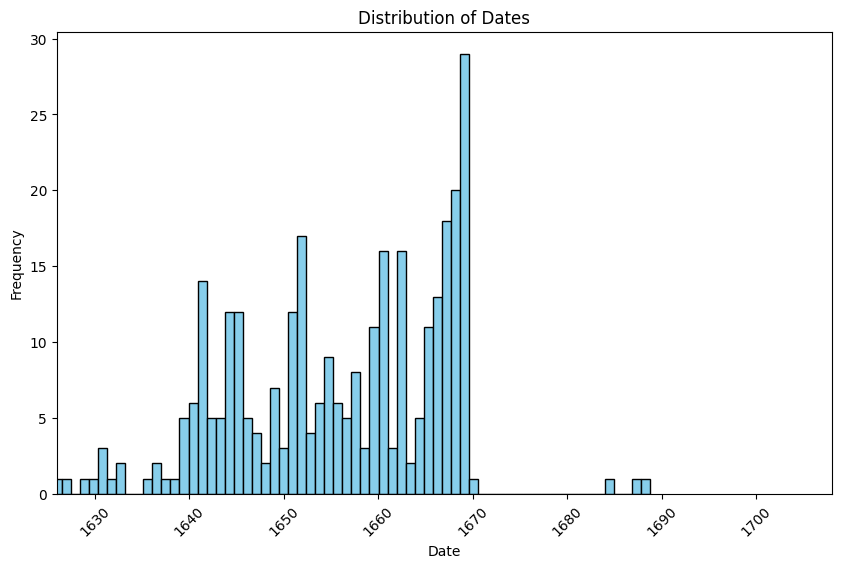

In [27]:
# Simple histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(event_df['date_edtf_lower_strict'], bins=100, color='skyblue', edgecolor='black')
start_date = datetime.datetime(1626, 1, 1)
end_date = datetime.datetime(1707, 12, 31)
plt.xlim(start_date, end_date)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Dates')
plt.xticks(rotation=45)
plt.show()
